In [150]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import datetime as dt

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [151]:
df = pd.read_csv('data.csv', encoding = 'latin1')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [153]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [154]:
#check missing values
print(f'Missing values for each columns:\n{df.isnull().sum()}')
print('\n')
print(f'Percentage of missing values: \n{(df.isnull().sum() / len(df) * 100).round(2).astype(str) + '%'}')

df[df.isnull().any(axis=1)]

Missing values for each columns:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Percentage of missing values: 
InvoiceNo        0.0%
StockCode        0.0%
Description     0.27%
Quantity         0.0%
InvoiceDate      0.0%
UnitPrice        0.0%
CustomerID     24.93%
Country          0.0%
dtype: object


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [155]:
#remove missing values

df = df.dropna(subset= ['Description', 'CustomerID'])

In [156]:
# re-check missing values

print(f'Missing values for each columns:\n{df.isnull().sum()}')
print('\n')
print(f'Percentage of missing values: \n{(df.isnull().sum() / len(df) * 100).round(2).astype(str) + '%'}')

Missing values for each columns:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Percentage of missing values: 
InvoiceNo      0.0%
StockCode      0.0%
Description    0.0%
Quantity       0.0%
InvoiceDate    0.0%
UnitPrice      0.0%
CustomerID     0.0%
Country        0.0%
dtype: object


In [157]:
# check duplicates

print(f'Total duplicated: {df.duplicated().sum()}')

df[df.duplicated()]

Total duplicated: 5225


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.00,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.00,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.00,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.00,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.00,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.00,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.00,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.00,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.00,United Kingdom


In [158]:
# renove duplicates

df.drop_duplicates(keep= 'first', inplace= True)

# re-check duplicates

print(f'Total duplicated: {df.duplicated().sum()}')

Total duplicated: 0


In [159]:
#check anomali data

print(f'Unit Price below 0: {len(df[df['UnitPrice'] <= 0])}')

Unit Price below 0: 40


In [160]:
# filter data 

df = df[
    (df['UnitPrice'] >= 0.01)
    ]

#re-check
print(f'Unit Price below 0: {len(df[df['UnitPrice'] <= 0])}')

Unit Price below 0: 0


In [161]:
# check cancel transactions
print(f'there were {len(df[df['InvoiceNo'].str.contains('C')])} canceled transactions')

there were 8872 canceled transactions


In [162]:
# change datatype for 'InvoiceDate' and 'CustomerID'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)

# Add new columns
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month_name()
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['InvoiceDay'] = df['InvoiceDate'].dt.date
df['InvoiceDay'] = pd.to_datetime(df['InvoiceDay'])
df['TotalSpend'] = df['UnitPrice'] * df['Quantity']
df['Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Canceled', 'Completed')


df = df.sort_values(by = 'InvoiceDate', ascending= True).reset_index(drop= True)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,YearMonth,InvoiceDay,TotalSpend,Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,December,2010-12,2010-12-01,15.30,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,December,2010-12,2010-12-01,20.34,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,December,2010-12,2010-12-01,22.00,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,December,2010-12,2010-12-01,20.34,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,December,2010-12,2010-12-01,20.34,Completed


# Customer Data

In [163]:
# Recency
last_purchase_dates = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()
last_purchase_dates.rename(columns={'InvoiceDay': 'LastPurchaseDate'}, inplace=True)

recent_dates_data = df['InvoiceDay'].max()
recent_dates_data = pd.to_datetime(recent_dates_data)

last_purchase_dates['Day_Last_Purchase'] = (recent_dates_data - last_purchase_dates['LastPurchaseDate']).dt.days
last_purchase_dates = last_purchase_dates.drop(columns= 'LastPurchaseDate')
'----------------------------------------------------------------------------------------------------------------------'
# Frequency
total_transaction = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transaction = total_transaction.rename(columns= {'InvoiceNo' : 'Total_Transaction'})
'----------------------------------------------------------------------------------------------------------------------'
total_product_purchase = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_product_purchase = total_product_purchase.rename(columns= {'Quantity' : 'Total_Purchase_Products'})
'----------------------------------------------------------------------------------------------------------------------'
# Monetary
total_spend = df.groupby('CustomerID')['TotalSpend'].sum().reset_index()
total_spend = total_spend.rename(columns= {'TotalSpend' : 'Total_Spend'})
'----------------------------------------------------------------------------------------------------------------------'
# Merge data
customer_data = pd.merge(last_purchase_dates, total_transaction, on= 'CustomerID')
customer_data = pd.merge(customer_data, total_product_purchase, on = 'CustomerID')
customer_data = pd.merge(customer_data, total_spend, on = 'CustomerID')

customer_data = customer_data.reset_index(drop=True)

customer_data

,CustomerID,Day_Last_Purchase,Total_Transaction,Total_Purchase_Products,Total_Spend
0,12346,325,2,0,0.00
1,12347,2,7,2458,4310.00
2,12348,75,4,2341,1797.24
3,12349,18,1,631,1757.55
4,12350,310,1,197,334.40
...,...,...,...,...,...
4366,18280,277,1,45,180.60
4367,18281,180,1,54,80.82
4368,18282,7,3,98,176.60
4369,18283,3,16,1357,2045.53


In [164]:
zero_spend = customer_data[customer_data['Total_Purchase_Products'] <= 0]

zero_spend

,CustomerID,Day_Last_Purchase,Total_Transaction,Total_Purchase_Products,Total_Spend
0,12346,325,2,0,0.00
89,12454,53,2,0,-0.00
125,12503,337,1,-1,-1126.00
127,12505,301,1,-1,-4.50
170,12558,1,2,0,0.00
212,12605,365,1,-4,-7.50
213,12607,58,2,0,0.00
264,12666,359,1,-56,-227.44
415,12870,366,1,-2,-14.90
440,12908,58,4,0,246.00


In [165]:
#delete anomalous data (product purchased <0)
customer_data = customer_data[customer_data['Total_Purchase_Products'] > 0]

In [166]:
# check Total_Spend (Monetary) to see if the data have anomalies data
customer_data[customer_data['Total_Spend'] < 0]

,CustomerID,Day_Last_Purchase,Total_Transaction,Total_Purchase_Products,Total_Spend
1543,14437,143,2,59,-43.40
3038,16454,44,3,2,-8.15
4209,18072,155,2,46,-0.00


In [167]:
# Get Customer ID that have anomalies data in Total Spend
anomalies_customer = customer_data[customer_data['Total_Spend'] < 0]
anomalies_customer = anomalies_customer['CustomerID'].unique()

anomalies_customer

array([14437, 16454, 18072])

In [168]:
# filter data to delete anomalies data
customer_data = customer_data[~customer_data['CustomerID'].isin(anomalies_customer)]
df = df[~df['CustomerID'].isin(anomalies_customer)]

In [169]:
# add new feature
customer_data['Average_Spend_Per_Product'] = customer_data['Total_Spend'] / customer_data['Total_Purchase_Products']
customer_data['Average_Spend_Per_Product'] = customer_data['Average_Spend_Per_Product'].fillna(0)

customer_data['Average_Spend_Per_Transactions'] = customer_data['Total_Spend'] / customer_data['Total_Transaction']

# Add Unique Product Purchase
product_purchase = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
product_purchase = product_purchase.rename(columns= {'StockCode' : 'Unique_Product_Purchase'})

#Merge Data
customer_data = pd.merge(customer_data, product_purchase, on = 'CustomerID', how = 'left')

#Add Cancellation Frequency
canceled_transactions = df[df['Status'] == 'Canceled']
canceled_frequency = canceled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
canceled_frequency = canceled_frequency.rename(columns= {'InvoiceNo' : 'Total_Cancellation'})
canceled_frequency = canceled_frequency.fillna(0)

#Merge Data
customer_data = pd.merge(customer_data, canceled_frequency, on = 'CustomerID', how = 'left')

customer_data['Total_Cancellation'] = customer_data['Total_Cancellation'].fillna(0)
customer_data['Cancellation_Rate'] = customer_data['Total_Cancellation'] / customer_data['Total_Transaction']

customer_data.head()

,CustomerID,Day_Last_Purchase,Total_Transaction,Total_Purchase_Products,Total_Spend,Average_Spend_Per_Product,Average_Spend_Per_Transactions,Unique_Product_Purchase,Total_Cancellation,Cancellation_Rate
0,12347,2,7,2458,4310.00,1.75,615.71,103,0.00,0.00
1,12348,75,4,2341,1797.24,0.77,449.31,22,0.00,0.00
2,12349,18,1,631,1757.55,2.79,1757.55,73,0.00,0.00
3,12350,310,1,197,334.40,1.70,334.40,17,0.00,0.00
4,12352,36,11,470,1545.41,3.29,140.49,59,3.00,0.27


In [170]:
target_cols = ['Total_Transaction', 'Total_Purchase_Products', 'Total_Spend', 'Unique_Product_Purchase']

def top_5_customer(data, target_cols):

    results = {}

    for col in target_cols:
        table = data.nlargest(5, col)[['CustomerID', col]]
        results[col] = table

    return results

top_5 = top_5_customer(customer_data, target_cols)

top_transaction = top_5['Total_Transaction']
top_products = top_5['Total_Purchase_Products']
top_spend = top_5['Total_Spend']
top_unique_products = top_5['Unique_Product_Purchase']

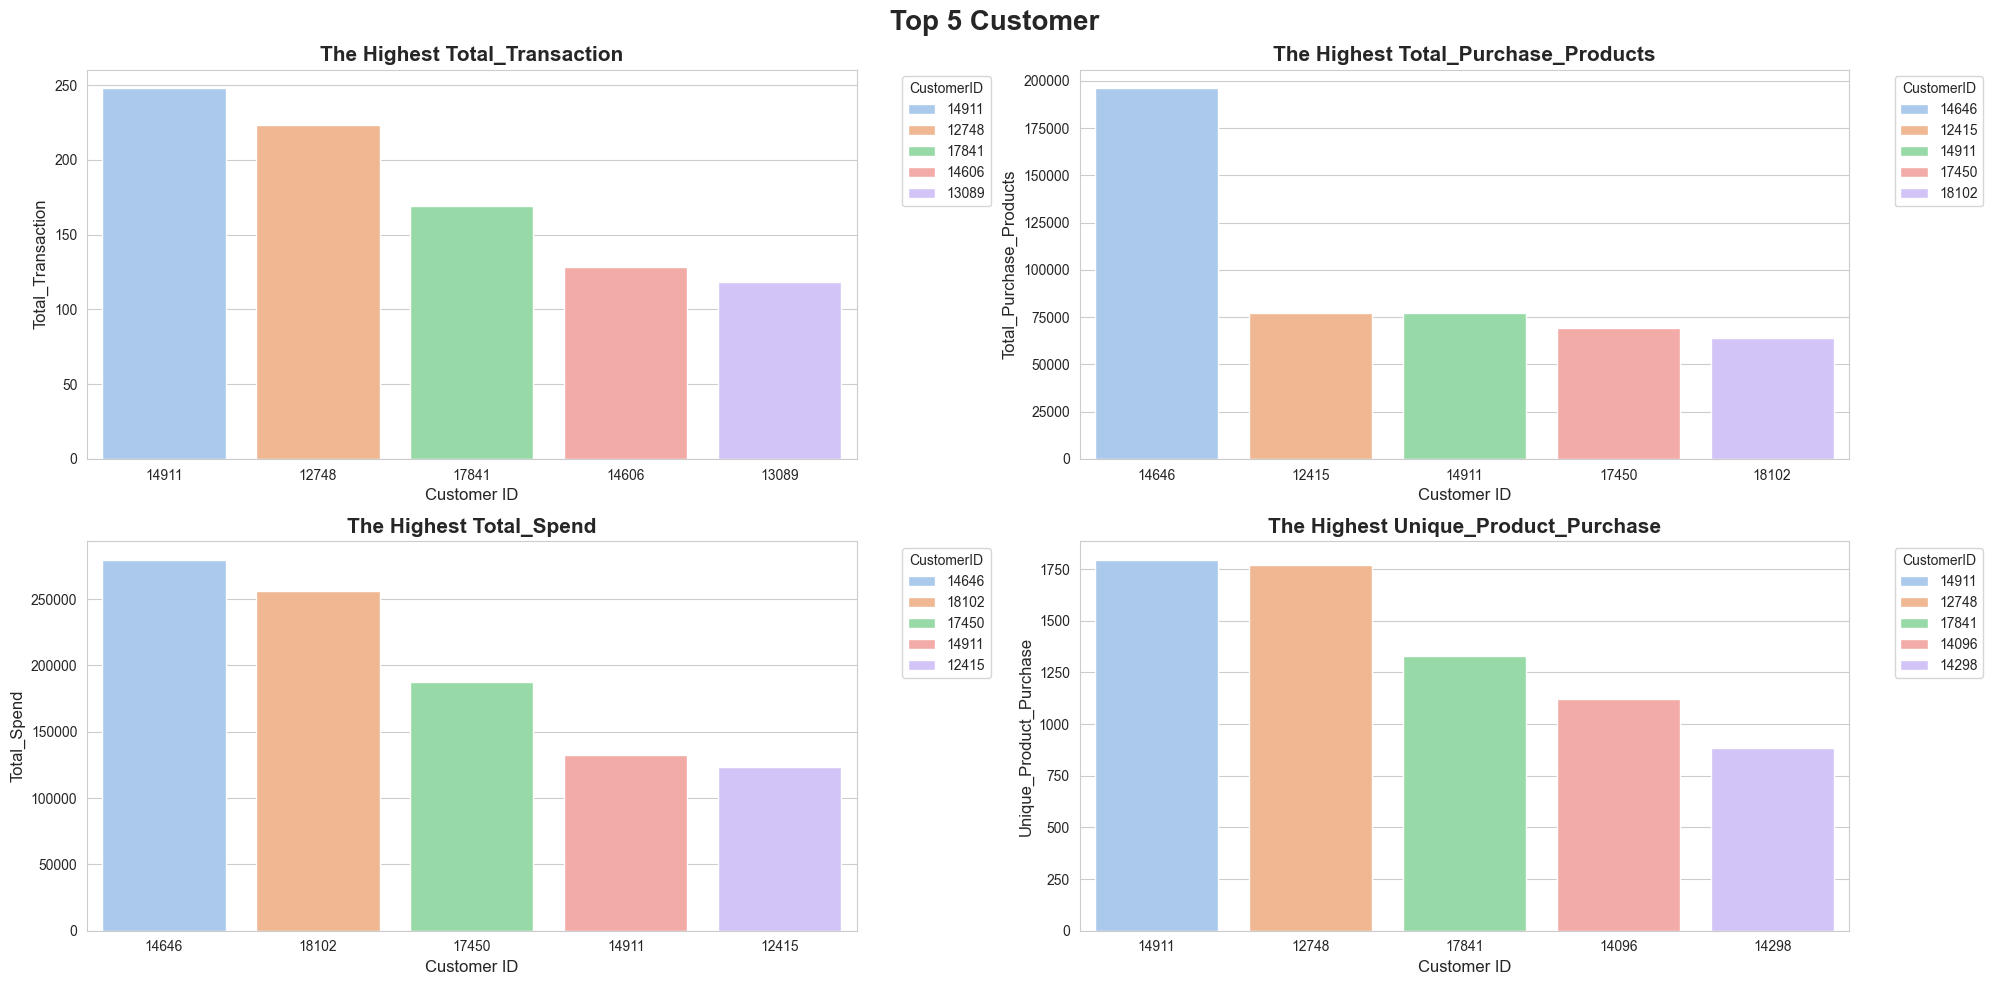

In [171]:
def customer_bar_chart(data_dict, target_cols):

    plt.figure(figsize=(20,10))

    for i, col in enumerate(target_cols, 1):
        plt.subplot(2,2,i)
        df = data_dict[col]
        df['CustomerID'] = pd.Categorical(df['CustomerID'],
                                          categories=df['CustomerID'],
                                          ordered=True)
        
        sns.barplot(data = df,
                    x = 'CustomerID',
                    y = col,
                    hue = 'CustomerID',
                    palette= 'pastel')
        
        plt.title(f'The Highest {col}', fontsize = 15, fontweight = 'bold')
        plt.xlabel('Customer ID', fontsize = 12)
        plt.ylabel(col, fontsize = 12)
        plt.legend(title='CustomerID', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.suptitle('Top 5 Customer', fontsize = 20, fontweight = 'bold')
    plt.tight_layout()
    plt.savefig('Top 5 Customer', dpi = 300)
    plt.show()

customer_bar_chart(top_5, target_cols)


# Transactions

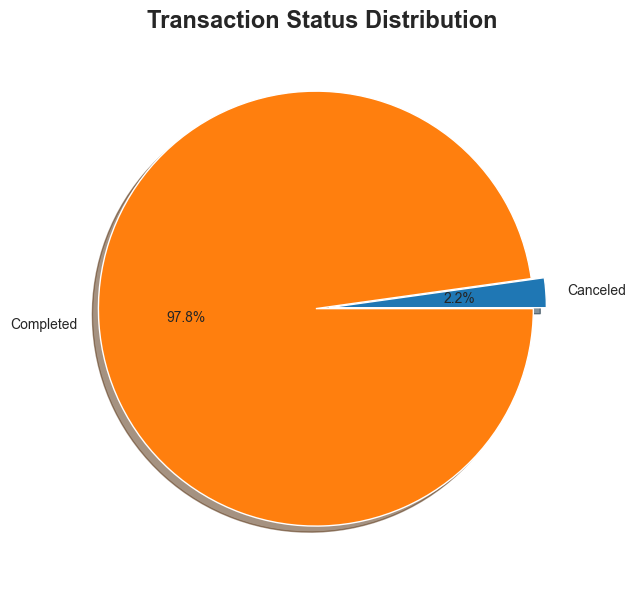

In [172]:
transactions = df.groupby('Status').size().reset_index(name= 'Total')

explode = (0.03, 0.03)
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8,6))
plt.pie(transactions['Total'],
        labels= transactions['Status'],
        autopct= '%1.1f%%',
        explode= explode,
        colors= colors,
        shadow= True)

plt.title('Transaction Status Distribution', fontsize = 17, fontweight = 'bold')

plt.tight_layout()
plt.show()

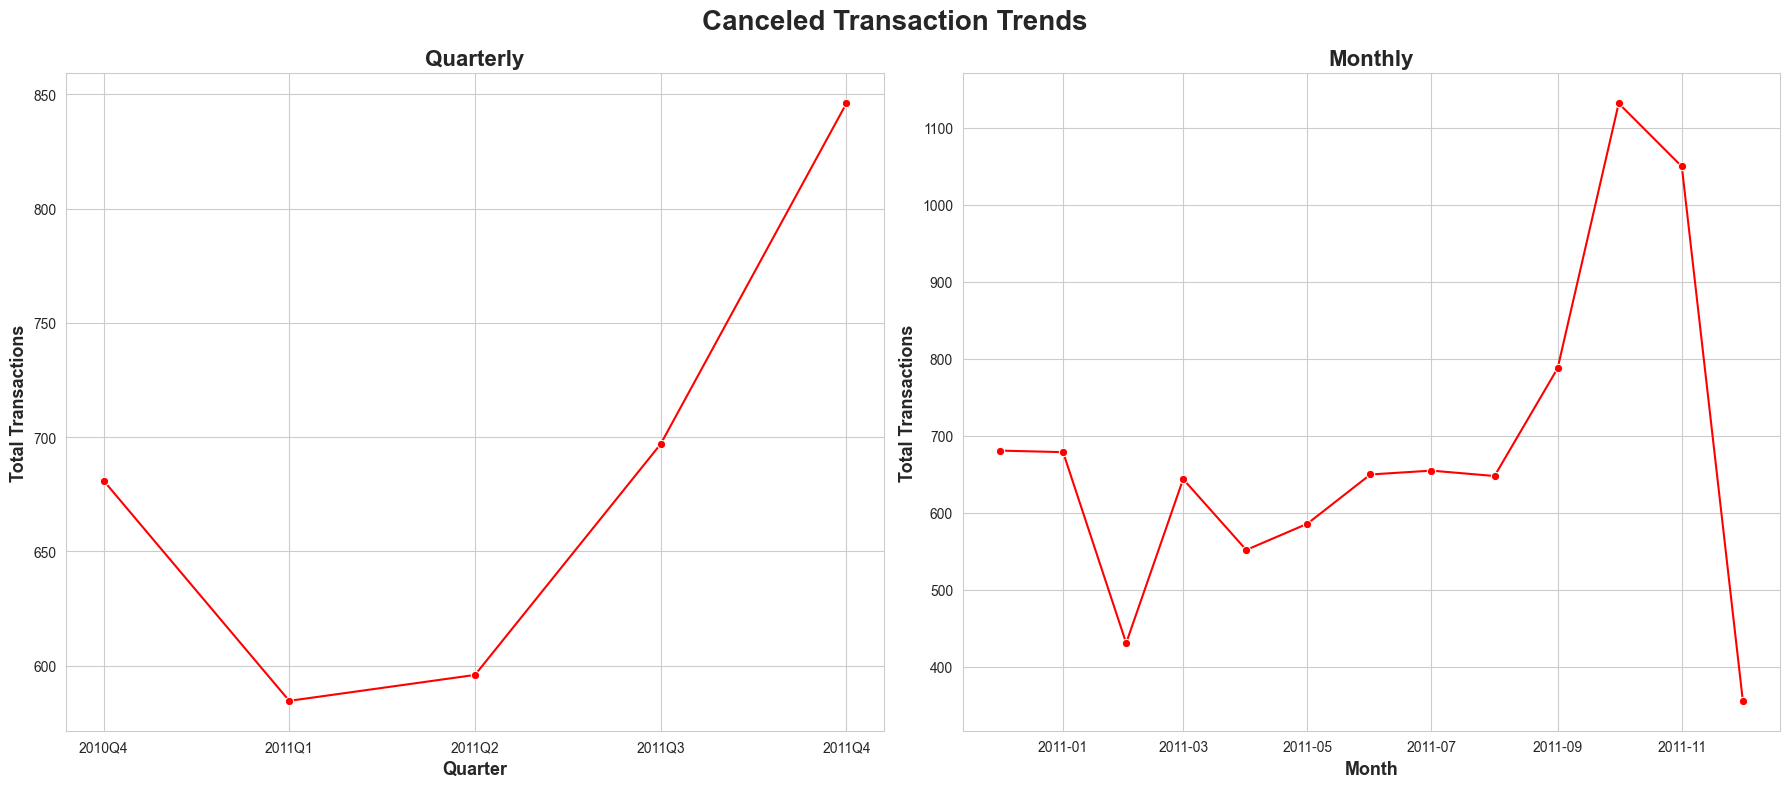

In [173]:
canceled_transactions = df[df['Status'] == 'Canceled']

canceled_transactions = canceled_transactions.copy()
canceled_transactions.sort_values(by = 'YearMonth', ascending= True, inplace= True)

canceled_transactions = canceled_transactions.groupby('YearMonth').size().reset_index(name = 'Total_Canceled_Transactions')
canceled_transactions['YearMonth'] = canceled_transactions['YearMonth'].dt.to_timestamp()
canceled_transactions['Quarter'] = canceled_transactions['YearMonth'].dt.to_period('Q').astype(str)

plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.lineplot(data = canceled_transactions,
             x = 'Quarter',
             y = 'Total_Canceled_Transactions',
             marker = 'o',
             color = 'red',
            errorbar = None)

plt.title('Quarterly', fontsize = 16, fontweight = 'bold')
plt.xlabel('Quarter', fontsize = 13, fontweight = 'bold')
plt.ylabel('Total Transactions', fontsize = 13, fontweight = 'bold')

plt.subplot(1,2,2)
sns.lineplot(data = canceled_transactions,
             x = 'YearMonth',
             y = 'Total_Canceled_Transactions',
             marker = 'o',
             color = 'red',
            errorbar = None)

plt.title('Monthly', fontsize = 16, fontweight = 'bold')
plt.xlabel('Month', fontsize = 13, fontweight = 'bold')
plt.ylabel('Total Transactions', fontsize = 13, fontweight = 'bold')
plt.suptitle('Canceled Transaction Trends', fontsize = 20, fontweight = 'bold')

plt.tight_layout()
plt.show()

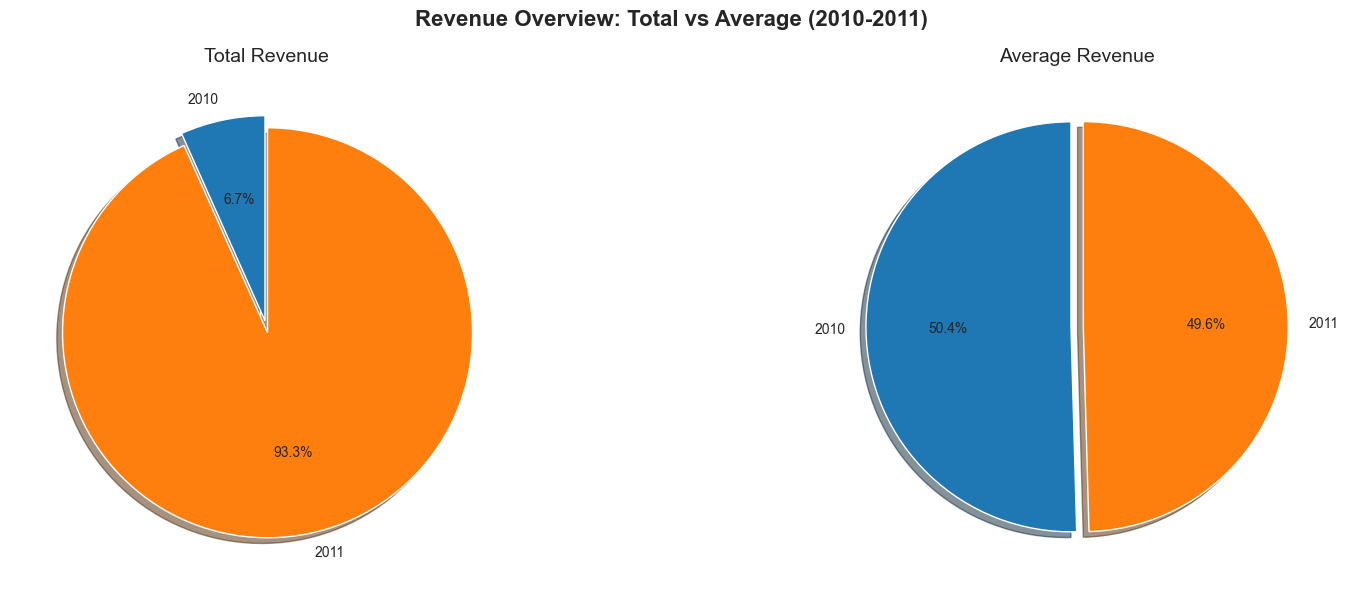

In [174]:
total_price = df.groupby('Year')['TotalSpend'].sum()
average_price = df.groupby('Year')['TotalSpend'].mean()

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.pie(total_price.values,
        labels=total_price.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#1f77b4', '#ff7f0e'],
        shadow=True,
        explode=explode
        )
plt.title('Total Revenue', fontsize=14)

plt.subplot(1,2,2)
plt.pie(average_price.values,
        labels=average_price.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#1f77b4', '#ff7f0e'],
        shadow=True,
        explode=explode
        )
plt.title('Average Revenue', fontsize=14)

plt.suptitle('Revenue Overview: Total vs Average (2010-2011)', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


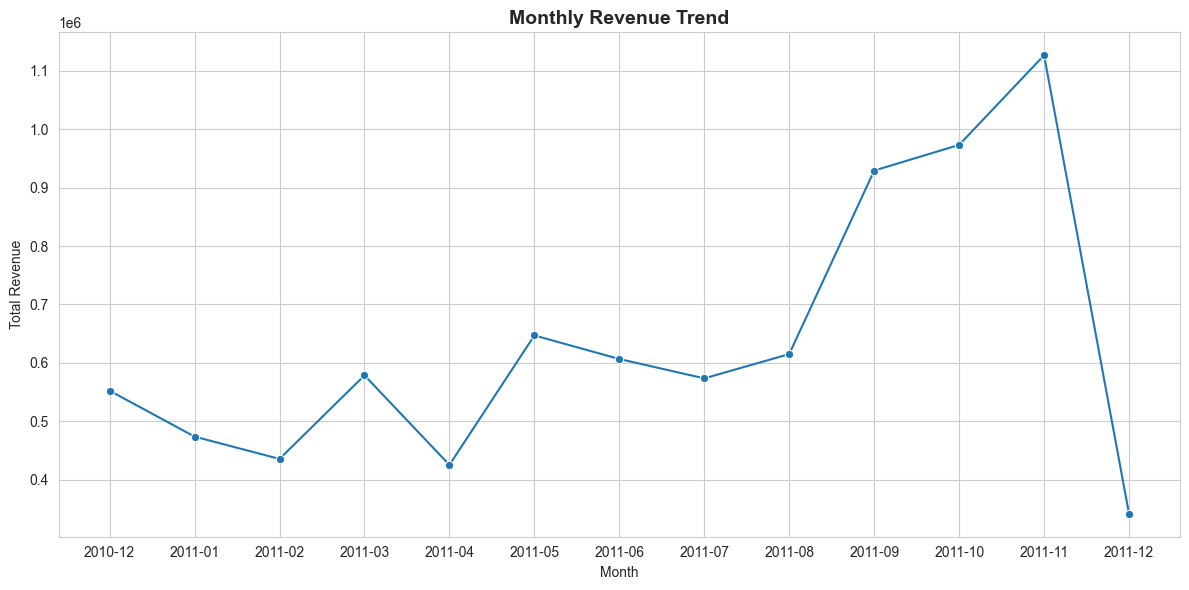

In [175]:
monthly_revenue = df.groupby('YearMonth')['TotalSpend'].sum()

plt.figure(figsize=(12,6))

sns.lineplot(x=monthly_revenue.index.astype(str), 
             y=monthly_revenue.values, 
             marker="o",
             errorbar = None)

plt.title("Monthly Revenue Trend", fontsize = 14, fontweight = 'bold')
plt.xlabel("Month")
plt.ylabel("Total Revenue")

plt.tight_layout()
plt.savefig('Monthly Revenue Trend', dpi = 300)
plt.show()

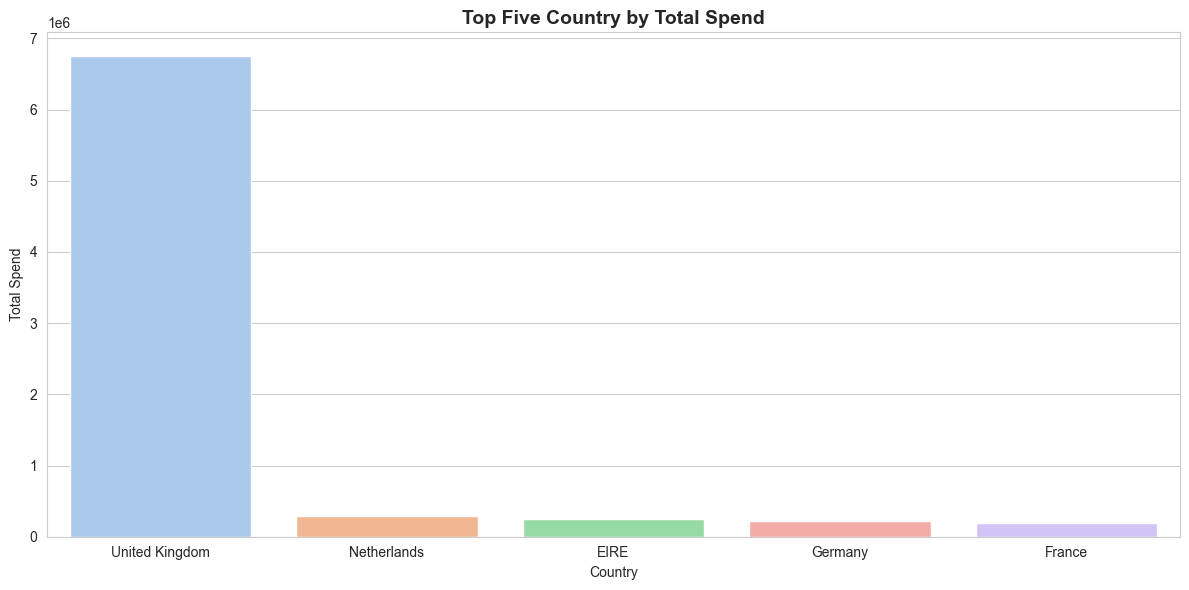

In [176]:
top_country = df.groupby('Country')['TotalSpend'].sum().sort_values(ascending= False).head(5)

plt.figure(figsize=(12,6))

sns.barplot(x= top_country.index, 
            y= top_country.values, 
            hue = top_country.index,
            palette= 'pastel',
            errorbar = None)

plt.title("Top Five Country by Total Spend", fontsize = 14, fontweight = 'bold')
plt.xlabel("Country")
plt.ylabel("Total Spend")

plt.tight_layout()
plt.savefig('Top Five Country by Total Spend', dpi = 300)
plt.show()

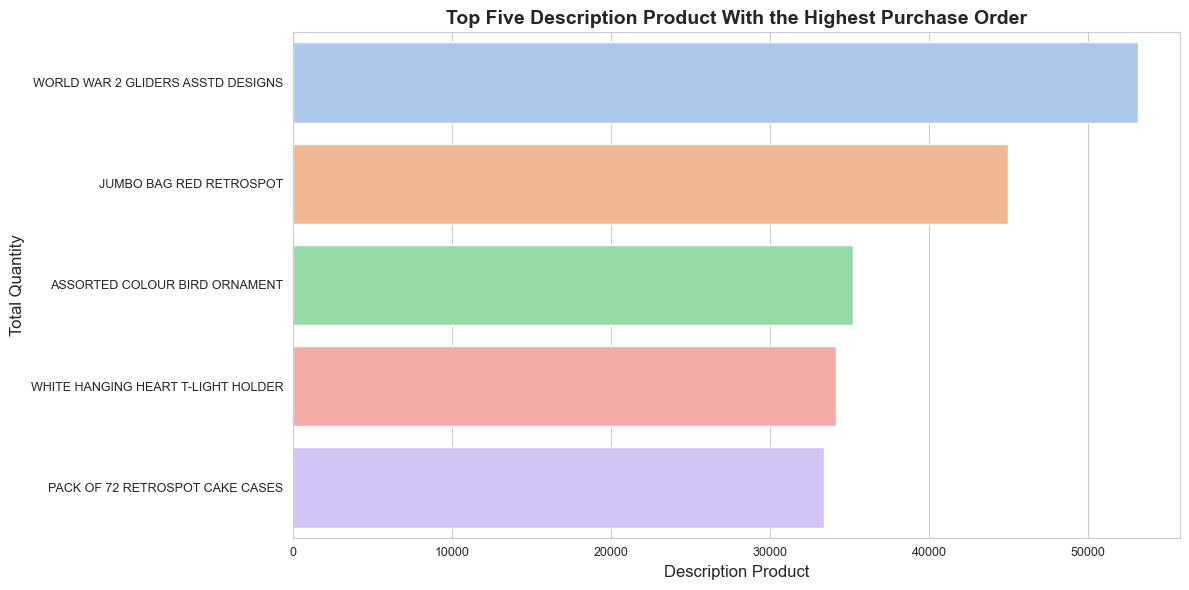

In [177]:
description_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12,6))

sns.barplot(y = description_quantity.index,
            x = description_quantity.values,
            hue = description_quantity.index,
            palette= 'pastel',
            errorbar= None)

plt.title('Top Five Description Product With the Highest Purchase Order', fontsize = 14, fontweight = 'bold')
plt.xlabel('Description Product', fontsize = 12)
plt.xticks(fontsize = 9)
plt.ylabel('Total Quantity', fontsize = 12)
plt.yticks(fontsize = 9)

plt.tight_layout()
plt.show()

In [178]:
country = df.groupby('Country').size().reset_index(name = 'Total')

fig = px.choropleth(
    country,                    
    locations='Country',        
    locationmode='country names', 
    color='Total',              
    title='Transaction Distribution by Country',
    color_continuous_scale='Plasma'  
)

fig.update_layout(
    geo=dict(
        showland=True,
        showcountries=True,
        showocean=True,
        oceancolor='lightblue',
        countrycolor='gray'
    ),
    height=600,  
    width=1000  
)

# Tampilkan peta
fig.show()

# Scale data to apply K-Means for clustering

for clustering customers, I prefer to clustering based on RFM (Recency (Day_Last_Purchase), Frequency (Total_Transaction), and Monetary (Total_Spend))

In [179]:
feature_to_scale = ['Day_Last_Purchase', 'Total_Transaction', 'Total_Spend']

rfm_data = customer_data.copy()
rfm_data = rfm_data[feature_to_scale]

scaler = StandardScaler()

rfm_data_scale = rfm_data.copy()

rfm_data_scale[feature_to_scale] = scaler.fit_transform(rfm_data[feature_to_scale])

rfm_data_scale



,Day_Last_Purchase,Total_Transaction,Total_Spend
0,-0.89,0.20,0.29
1,-0.15,-0.12,-0.02
2,-0.72,-0.44,-0.02
3,2.22,-0.44,-0.19
4,-0.54,0.63,-0.05
...,...,...,...
4310,1.89,-0.44,-0.21
4311,0.91,-0.44,-0.22
4312,-0.84,-0.23,-0.21
4313,-0.88,1.16,0.02


In [180]:
num_clusters = np.arange(2,11)

def find_inertia_silhoutte_score(data, num_clusters):

    inertia = []
    sil_score = []

    for num in num_clusters:
        kmeans = KMeans(n_clusters= num, random_state=42).fit(data)
        inertia.append(kmeans.inertia_)
        sil_score.append(silhouette_score(data, kmeans.labels_))

    return inertia, sil_score

inertia, sil_score = find_inertia_silhoutte_score(rfm_data_scale, num_clusters)
    

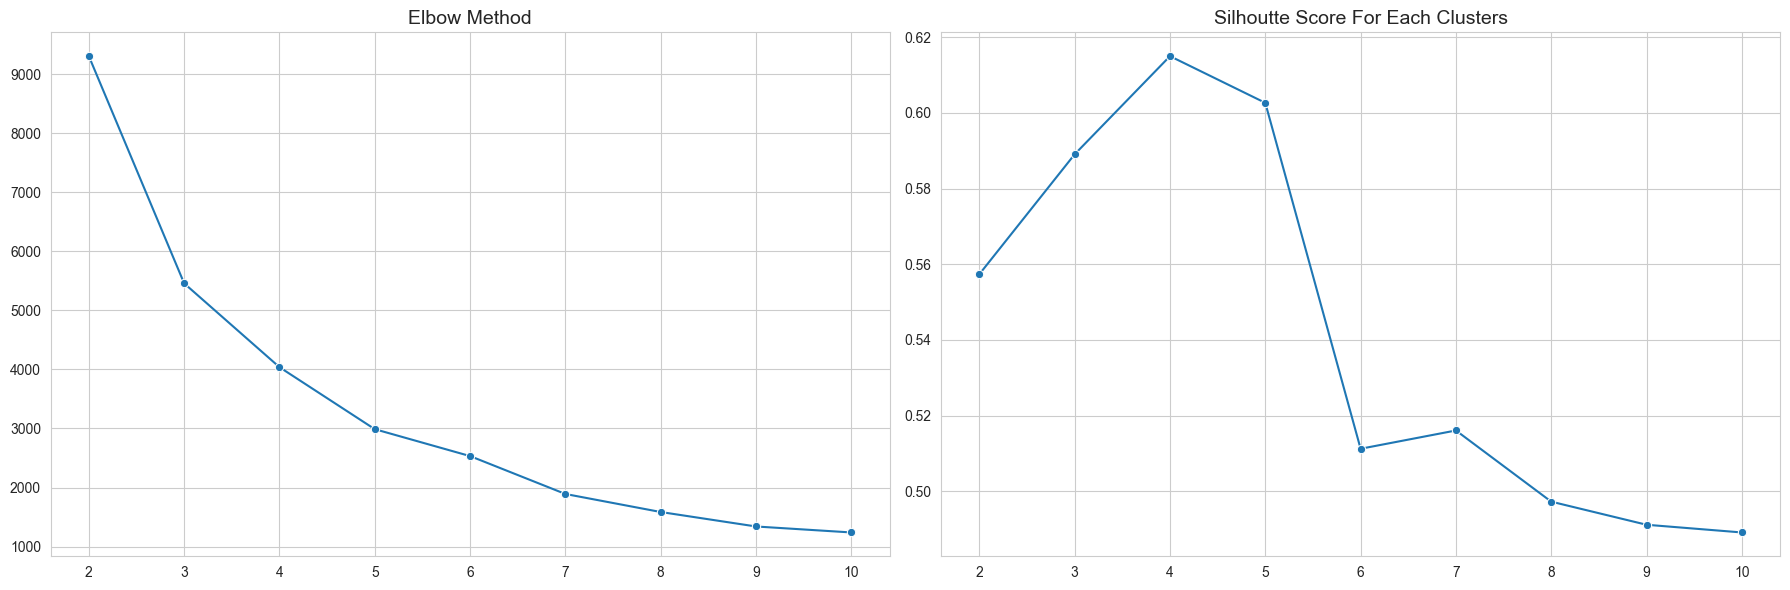

In [181]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.lineplot(x = num_clusters,
             y = inertia,
             marker = 'o')
plt.title('Elbow Method', fontsize = 14)

plt.subplot(1,2,2)
sns.lineplot(x = num_clusters,
             y = sil_score,
             marker = 'o')
plt.title('Silhoutte Score For Each Clusters', fontsize = 14)

plt.tight_layout()
plt.show()

In [182]:
k_means_4 = KMeans(n_clusters= 4, random_state=42)

customer_data['Cluster'] = k_means_4.fit_predict(rfm_data_scale)

customer_data



,CustomerID,Day_Last_Purchase,Total_Transaction,Total_Purchase_Products,Total_Spend,Average_Spend_Per_Product,Average_Spend_Per_Transactions,Unique_Product_Purchase,Total_Cancellation,Cancellation_Rate,Cluster
0,12347,2,7,2458,4310.00,1.75,615.71,103,0.00,0.00,1
1,12348,75,4,2341,1797.24,0.77,449.31,22,0.00,0.00,1
2,12349,18,1,631,1757.55,2.79,1757.55,73,0.00,0.00,1
3,12350,310,1,197,334.40,1.70,334.40,17,0.00,0.00,0
4,12352,36,11,470,1545.41,3.29,140.49,59,3.00,0.27,1
...,...,...,...,...,...,...,...,...,...,...,...
4310,18280,277,1,45,180.60,4.01,180.60,10,0.00,0.00,0
4311,18281,180,1,54,80.82,1.50,80.82,7,0.00,0.00,0
4312,18282,7,3,98,176.60,1.80,58.87,12,1.00,0.33,1
4313,18283,3,16,1357,2045.53,1.51,127.85,263,0.00,0.00,1


In [183]:
customer_data.groupby('Cluster').mean(numeric_only=True)

,CustomerID,Day_Last_Purchase,Total_Transaction,Total_Purchase_Products,Total_Spend,Average_Spend_Per_Product,Average_Spend_Per_Transactions,Unique_Product_Purchase,Total_Cancellation,Cancellation_Rate
Cluster,,,,,,,,,,
0,15365.85,245.30,1.85,273.98,488.02,3.04,277.17,26.35,0.28,0.08
1,15284.29,41.76,4.39,809.22,1326.87,2.65,322.17,63.71,0.66,0.10
2,15289.09,4.36,109.73,65257.91,124150.43,1.93,1954.08,791.64,18.09,0.17
3,15191.09,10.25,28.58,7249.67,12190.96,1.96,452.53,186.04,5.62,0.19


After analyzing the average values for each cluster, it's clear that each group exhibits distinct customer characteristics and behaviors. Here's a concise breakdown:

- Cluster 0: Inactive Low Customers: These customers haven't purchased in a while and their total spending is low.
- Cluster 1: Active Mid Customers: These customers have made recent purchases and spend a moderate amount overall.
- Cluster 2: Top Tier Customers: These customers spend the most money overall, regardless of how often or recently they buy.
- Cluster 3: Active High Customers: These customers make purchases frequently and their total spending is high.

In [184]:
customer_data['RFM_Cluster'] = customer_data['Cluster'].map({
    0 : 'Inactive Low Customers',
    1 : 'Active Mid Customers',
    2 : 'Top Tier Customers',
    3 : 'Active High Customers'
})

customer_data = customer_data.drop(columns= 'Cluster')

customer_data.head()

,CustomerID,Day_Last_Purchase,Total_Transaction,Total_Purchase_Products,Total_Spend,Average_Spend_Per_Product,Average_Spend_Per_Transactions,Unique_Product_Purchase,Total_Cancellation,Cancellation_Rate,RFM_Cluster
0,12347,2,7,2458,4310.00,1.75,615.71,103,0.00,0.00,Active Mid Customers
1,12348,75,4,2341,1797.24,0.77,449.31,22,0.00,0.00,Active Mid Customers
2,12349,18,1,631,1757.55,2.79,1757.55,73,0.00,0.00,Active Mid Customers
3,12350,310,1,197,334.40,1.70,334.40,17,0.00,0.00,Inactive Low Customers
4,12352,36,11,470,1545.41,3.29,140.49,59,3.00,0.27,Active Mid Customers


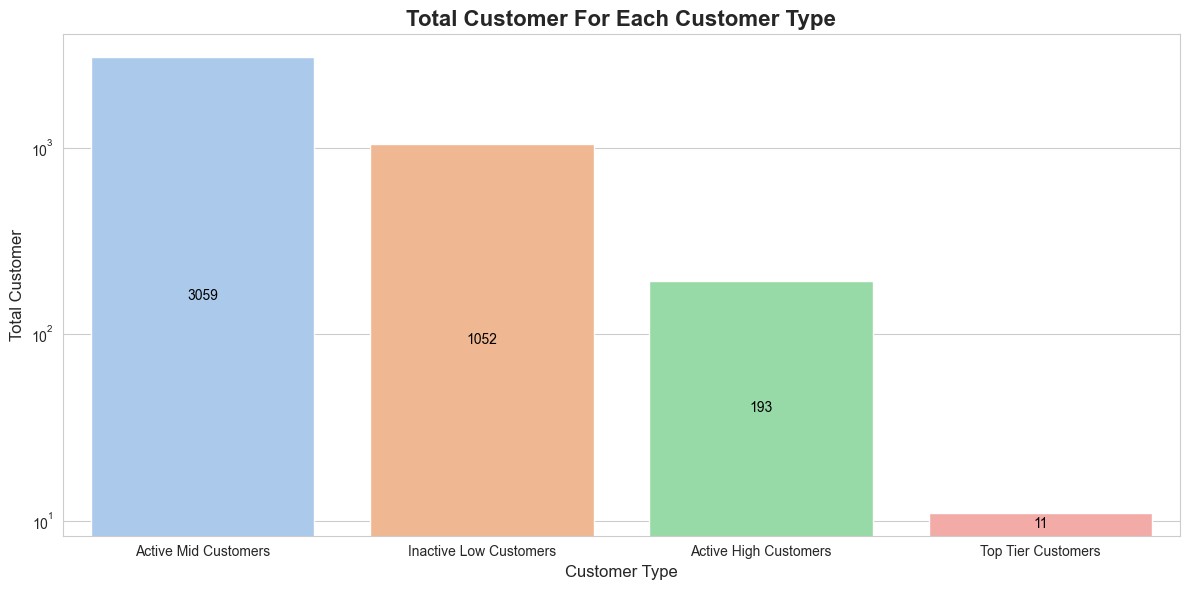

In [185]:
customer_segment = customer_data.groupby('RFM_Cluster').size().reset_index(name = 'Total_Customer').sort_values(by = 'Total_Customer', ascending= False)

plt.figure(figsize=(12,6))

ax = sns.barplot(data = customer_segment,
            x = 'RFM_Cluster',
            y = 'Total_Customer',
            hue = 'RFM_Cluster',
            palette= 'pastel')

plt.title('Total Customer For Each Customer Type', fontsize = 16, fontweight = 'bold')
plt.xlabel('Customer Type', fontsize = 12)
plt.ylabel('Total Customer', fontsize = 12)

ax.set_yscale('log')

for container in ax.containers:
    ax.bar_label(container, label_type= 'center', color = 'black')

plt.tight_layout()
plt.savefig('Total Customer For Each Customer Type', dpi = 300)
plt.show()


In [186]:
#save data
df.to_csv('e-commerce_data.csv')
customer_data.to_csv('Customer_Data.csv')